In [44]:
## libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
import mplcursors
import csv, pandas as pd
from datetime import datetime, timedelta
from pylab import savefig

In [45]:
# files
exampleFiles=['example1.csv','example2.csv','example3.csv','example4.csv','example5.csv']
bpic2012Files=['bpic_2012.csv','bpic_2012_half.csv','bpic_2012_few.csv','bpic_2012_small.csv','bpic_2012_5481.csv']
roadTrafficFiles=['filtered_road_traffic_freq_1000_editted_below1000_count.csv','filtered_road_traffic_freq_1000_editted_below500_count.csv','filtered_road_traffic_freq_1000_editted_1_percent.csv','filtered_road_traffic_freq_1000_editted_5_percent.csv','filtered_road_traffic_freq_1000_editted_10_percent.csv','road_traffic_full.csv', 'road_traffic_partial.csv']
hospitalFiles=['Hospital log_frequent_small.csv','Hospital log_frequent_quarter.csv','Hospital log_frequent_half.csv','Hospital log_frequent.csv']
hospitalBillingFiles=['Hospital Billing Full.csv','Hospital Billing Half.csv']
productionFiles=['Production_Data - Copy.csv']

roadTrafficPath='./Road Traffic/'
hospitalLogPath='./Hospital Logs 2011/'
hospitalBilling = './Hospital Billing/'
productionPath = './Production_Data/'
# helpDeskPath='./helpdesk.csv'
helpdesk = './helpdesk/'
aeroplanePath='./aeroplane/aeroplane_output.csv'

In [46]:
# filepath = exampleFiles[4]
# filepath = hospitalLogPath+hospitalFiles[0]
# filepath = helpDeskPath
# filepath = aeroplanePath
# filepath = hospitalBilling+hospitalBillingFiles[1]
# filepath = helpdesk+'helpdesk_filtered_traceduration_2012.csv'
# filepath = productionPath+productionFiles[0]
filepath = './examples/exampleTwo.csv'
filepath = './example5.csv'

formats = ['%Y-%m-%dT%H:%M:%S', '%m/%d/%Y %H:%M:%S', '%d/%m/%Y %H:%M:%S', '%d/%m/%Y %H:%M']

datetimeFormat = formats[1]

In [47]:
df = pd.DataFrame([], columns=['case', 'activity', 'time'])
# with open(filepath) as csv_file:
#     csv_reader = csv.reader(csv_file, delimiter=',')
#     line_count = 0
#     header = []
#     for row in csv_reader:
#         if line_count == 0:
#             line_count += 1
#             header = row
#             #print("Headers: ", row)
#         else:
#             df = df.append(pd.DataFrame([row], columns=header),ignore_index=True)
#             line_count += 1
# https://stackoverflow.com/questions/11622652/large-persistent-dataframe-in-pandas
tp = pd.read_csv(filepath, iterator=True, chunksize=1000, converters={'case': str.strip, 'time': str.strip, 'activity': str.strip})  # gives TextFileReader, which is iterable with chunks of 1000 rows.
df = pd.concat(tp, ignore_index=True)  # df is DataFrame. If errors, do `list(tp)` instead of `tp`
#print(df.info())

In [48]:
#Length of the DataFrame
len(df.index)

60

In [49]:
##Sorting DataFrame by Case then Time.
df = df.sort_values(['case','time'], ascending=[True, True])
print(df)

divisor = 1
timeLabel = 'Time (Seconds)'

# #minute or Hour?
# minuteFlag = True
# divisor = 60 if minuteFlag else 3600
# timeLabel = 'Time (Minutes)' if minuteFlag else'Time (Hour)'

## group by case
listA = df.groupby(["case"])
links__ = []
timediff__ = []
for cases in df['case'].unique():
    temp__ = []
    time__ = []
    temp__.append(listA.get_group(cases)["activity"])
    time__.append(listA.get_group(cases)["time"])
    for idx, val in temp__[0].iteritems():
#     for idx, val in enumerate(temp__[0]):
        nextIndex = idx +1
        if nextIndex not in temp__[0].index:
            break
        else:
            links__.append({"source": val, "target": temp__[0][nextIndex]})
    for idx, val in time__[0].iteritems():
#     for idx, val in enumerate(time__[0]):
        nextIndex = idx +1
        if nextIndex not in time__[0].index:
            break
        else:
            timeDiffTemp__ = datetime.strptime(time__[0][nextIndex],datetimeFormat) - datetime.strptime(val,datetimeFormat)
            timediff__.append({"time": timeDiffTemp__.total_seconds()/divisor})

print('####')

                 case                                activity  \
40   declaration 7687                                   start   
41   declaration 7687                              Start trip   
42   declaration 7687                                End trip   
43   declaration 7687            Permit SUBMITTED by EMPLOYEE   
44   declaration 7687       Permit APPROVED by ADMINISTRATION   
45   declaration 7687     Permit FINAL_APPROVED by SUPERVISOR   
46   declaration 7687       Declaration SUBMITTED by EMPLOYEE   
47   declaration 7687  Declaration REJECTED by ADMINISTRATION   
48   declaration 7687        Declaration REJECTED by EMPLOYEE   
49   declaration 7687                                     end   
20  declaration 79488                                   start   
21  declaration 79488            Permit SUBMITTED by EMPLOYEE   
22  declaration 79488         Permit APPROVED by PRE_APPROVER   
23  declaration 79488     Permit FINAL_APPROVED by SUPERVISOR   
24  declaration 79488    

In [50]:
for val in range(0,len(links__)):    
    links__[val].update(timediff__[val])
    links__[val].update({'edge': str(links__[val]['source'])+'>'+str(links__[val]['target'])})
# print()

In [51]:
link = pd.DataFrame(links__)
# print(links__)
link.head()
len(link.index)

54

In [52]:
print('###### Before Filtering Statistics : ')
print(link['time'].describe())

###### Before Filtering Statistics : 
count        54.000000
mean      68400.000000
std       35043.132452
min        3600.000000
25%       64800.000000
50%       86400.000000
75%       86400.000000
max      111600.000000
Name: time, dtype: float64


In [53]:
## let us define a delta to check if the process has sub-divisions based on the time duration
# time in minutes/seconds; check minuteFlag section
# timeDeltaCheck = 0
# link = link[(link['time'] > timeDeltaCheck)]

In [54]:
print('######')
print(link['time'].describe())

######
count        54.000000
mean      68400.000000
std       35043.132452
min        3600.000000
25%       64800.000000
50%       86400.000000
75%       86400.000000
max      111600.000000
Name: time, dtype: float64


In [55]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
# plt.figure(figsize=(8,3))
# figA = sns.boxplot(x=link['source'], y=link['time'])
# plt.show()
# figB = sns.boxplot(x=link['target'], y=link['time'])
# plt.show()
# hue=link['edge'],

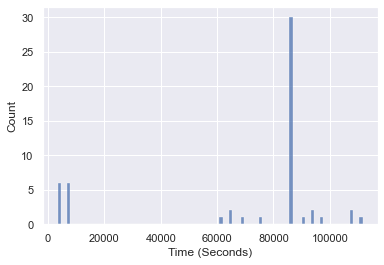

In [56]:
figX = sns.histplot(x=link['time'], stat="count", bins=100)
figX.set(xlabel=timeLabel)
plt.show()
downloadFigure = figX.get_figure()    
downloadFigure.savefig('timeAndCount.png', dpi=400)

In [57]:
# (link
# .groupby('time')
# .size() 
# .mul(100)
# .rename('percent')
# .reset_index()
# .pipe((sns.catplot,'data'), x='time',y='percent',hue='time',kind='bar'))

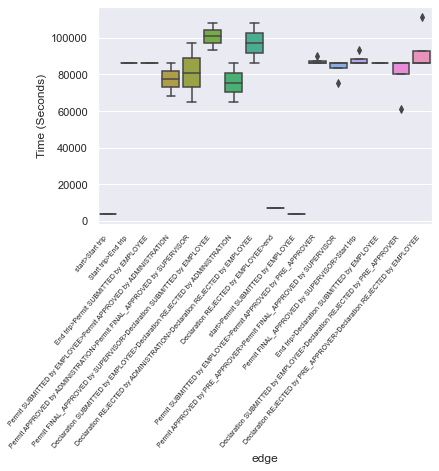

In [58]:
figC = sns.boxplot(x=link['edge'], y=link['time'])
plt.xticks(rotation=50, ha="right", fontsize=7)
figC.set(ylabel=timeLabel)
hoverText = mplcursors.cursor(figC, hover=True)
# hoverText.connect("add", lambda sel: sel.annotation.set_text(
#     'Edge {},{}'.format(link['edge'][sel.target[0]], sel.target[1])))
plt.show()
downloadFigure = figC.get_figure()    
downloadFigure.savefig('edgeAndProcessingTime.png', dpi=400)

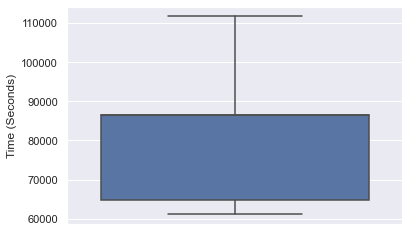

In [59]:
figBox = sns.boxplot(y=link['time'], showfliers=False) #, showfliers=False
plt.xticks(rotation=50, ha="right", fontsize=7)
figBox.set(ylabel=timeLabel)
hoverText = mplcursors.cursor(figBox, hover=True)
plt.show()
downloadFigure = figBox.get_figure()    
# downloadFigure.savefig('ProcessingTimeWithOutliers.png', dpi=400)
downloadFigure.savefig('ProcessingTimeWithOutOutliers.png', dpi=400)

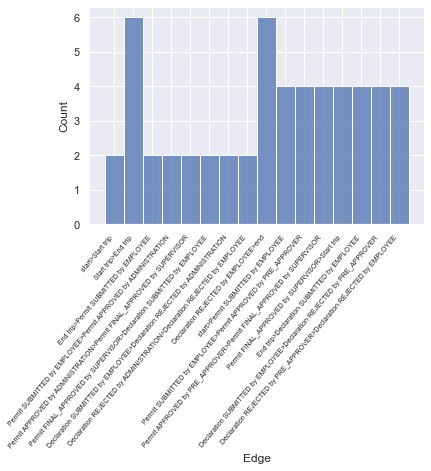

In [60]:
figY = sns.histplot(x=link['edge'], stat="count")
figY.set(xlabel='Edge')
hoverText = mplcursors.cursor(figY, hover=True)
plt.xticks(rotation=50, ha="right", fontsize=7)
plt.show()
downloadFigure = figY.get_figure()    
downloadFigure.savefig('edgeAndCount.png', dpi=400)

In [61]:
# g = sns.FacetGrid(link, col="source",  row="target")
# g = g.map(sns.histplot, 'time')

In [62]:
# to find the top frequent edges
n = 20
link['edge'].value_counts()[:n]

Start trip>End trip                                                         6
Declaration REJECTED by EMPLOYEE>end                                        6
Permit FINAL_APPROVED by SUPERVISOR>Start trip                              4
Declaration REJECTED by PRE_APPROVER>Declaration REJECTED by EMPLOYEE       4
Permit APPROVED by PRE_APPROVER>Permit FINAL_APPROVED by SUPERVISOR         4
End trip>Declaration SUBMITTED by EMPLOYEE                                  4
Permit SUBMITTED by EMPLOYEE>Permit APPROVED by PRE_APPROVER                4
Declaration SUBMITTED by EMPLOYEE>Declaration REJECTED by PRE_APPROVER      4
start>Permit SUBMITTED by EMPLOYEE                                          4
Permit SUBMITTED by EMPLOYEE>Permit APPROVED by ADMINISTRATION              2
Declaration SUBMITTED by EMPLOYEE>Declaration REJECTED by ADMINISTRATION    2
Declaration REJECTED by ADMINISTRATION>Declaration REJECTED by EMPLOYEE     2
Permit APPROVED by ADMINISTRATION>Permit FINAL_APPROVED by SUPER

In [63]:
#define the data for finding the model
temp__ = link.loc[link['edge'] == '1>8']

In [64]:
# trying to fit the model for an edge
# https://stackoverflow.com/questions/37487830/how-to-find-probability-distribution-and-parameters-for-real-data-python-3
import matplotlib.pyplot as plt
import scipy
import scipy.stats as st

# temp__ = link.loc[link['edge'] == 'FIN>RELEASE']
# print(temp__['time'].describe())

# dist_names = ['gamma', 'beta', 'rayleigh', 'norm', 'pareto']
dist_names = [ 'alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull', 'expon', 'exponweib', 'exponpow', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'genlogistic', 'genpareto', 'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'genhalflogistic', 'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'ksone', 'kstwobign', 'laplace', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'lomax', 'maxwell', 'mielke', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'reciprocal', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 't', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'wald', 'weibull_min', 'weibull_max', 'wrapcauchy']
dist_results = []
params = {}
for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(temp__['time'])
    # here's the parameters of your distribution, scale, location
    
    params[dist_name] = param
    # Applying the Kolmogorov-Smirnov test
    D, p = st.kstest(temp__['time'], dist_name, args=param)
    print("------------------------------------------")
    print("p value for "+dist_name+" = "+str(p))
    dist_results.append((dist_name, p))
    
# select the best fitted distribution
best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
# store the name of the best fit and its p value

print("------------------------------------------")
print("Best fitting distribution: "+str(best_dist))
print("Best p value: "+ str(best_p))
print("Parameters for the best fit: "+ str(params[best_dist]))
print("------------------------------------------")
    

c:\users\ayadi\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:2491: RuntimeWarning: Mean of empty slice.
  muhat = tmp.mean()
c:\users\ayadi\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\ayadi\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:2492: RuntimeWarning: Degrees of freedom <= 0 for slice
  mu2hat = tmp.var()
c:\users\ayadi\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
c:\users\ayadi\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: zero-size array to reduction operation minimum which has no identity

In [ ]:
figZ = sns.histplot(x=temp__['time'], stat="count")
figZ.set(xlabel=timeLabel)
hoverText = mplcursors.cursor(figZ, hover=True)
plt.xticks(rotation=50, ha="right", fontsize=7)
plt.show()

In [ ]:
figQ = sns.boxplot(y=temp__['time'], showfliers=False)
plt.xticks(rotation=50, ha="right", fontsize=7)
figQ.set(ylabel=timeLabel)
hoverText = mplcursors.cursor(figQ, hover=True)
plt.show()